<a href="https://colab.research.google.com/github/vishenka-git/nlp_sentiment_analysis/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#!ls "/content/gdrive/My Drive"

In [4]:
import pandas as pd
reviews = pd.read_excel('/content/gdrive/My Drive/reviews.xlsx')

print(reviews)

        target  ...                                        review_text
0         good  ...  Настоящее кино. Наше кино. Прекрасная работа с...
1         good  ...  Мало того, что сериал «Империя под ударом» (12...
2         good  ...  Период от реформ Александра Освободителя до пе...
3         good  ...  Атмосферный сериал о Российской Империи начала...
4      neutral  ...  Самая большая беда современного общества это т...
...        ...  ...                                                ...
80279     good  ...  О фильме узнал совершенно случайно, увидел пос...
80280     good  ...  Обожаю фильмы с Дэнни Гловером. Его последнее ...
80281     good  ...  Реслинг борьбе рознь!\n\r\nТак уж вышло, что в...
80282     good  ...  Удивительно, но даже такой рестлер-актер, как ...
80283     good  ...  Буду честным, я ожидал что весь фильм я буду с...

[80284 rows x 6 columns]


In [4]:
reviews.columns

Index(['target', 'movie_link', 'author_id', 'author_name', 'review_subtitle',
       'review_text'],
      dtype='object')

In [5]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [6]:
print(reviews[:20])

     target  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [80]:
reviews.head(10)

,target,movie_link,author_id,author_name,review_subtitle,review_text,review_len,word_count
0,1,/film/178563/,/user/311869/,sochi2014,NaN,"Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с таким тонким материалом, как история, требует мастерства и подлинного таланта. Это не фантазия и нахлынувшее воображение, а факты, подлинная история, с которой нельзя не считаться. Прочувственно то неспокойное время. Фильм не отвергает прошлое, как делают в некоторых картин, не старается выкрасить в чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о людях, об идеях, о любви. Повествует о стране, которая очень сильно изменилась, но по-прежнему существует. Хочется вериться, что никакие идеи и люди, которые борются за эти идеи, не пойдут по проторённой дороге. Уроки должны быть выучены, особенно уроки истории.",796.0,108.0
1,1,/film/178563/,/user/1591566/,Альберт Попов,Предтеча многого,"Мало того, что сериал «Империя под ударом» (12 серий по 45-50 мин., по «делу» на серию») сам по себе, на удивление, хорош и серьёзен, особенно памятуя то непростое время смены столетий и власти в России (ушёл Ельцин, пришёл Путин, уходили бандитские 90-е, восстанавливался, как мог, законопорядок), так он ещё и, вскоре став культовым, послужил предтечей многих последующих телесериальных работ. Но главное- он, наряду с некоторыми другими лентами, дал нам понять, что в современной России, при желании, терпении, старании и соответственном финансовом вливании, можно и нужно создавать не многосерийную мишуру, а вполне настоящее, только «длинное» Кино для телезрителей. Которое хочется пересматривать ещё и ещё и которое даёт пищу и для эмоций, и для души, и для ума. Особое же спасибо нашей «Империи » за привлечение зрительского внимания к российской истории 19-20-го веков (и к самой тамошней жизни, почему мы уже более 15 лет с удовольствием смотрим и детективы, и мелодрамы «из той поры»), ...",5166.0,751.0
2,1,/film/178563/,/user/331395/,LennoxL,Срез жизни общества начала 20 го века,"Период от реформ Александра Освободителя до первой русской революцией и вправду был эпохой индивидуального террора революционеров, в учебниках истории как правило упоминаются покушения на Александра II, одно закончилось удачно и брат Ленина в связи с покушением на Александра III, за что его и повесили. А вот террор против должностных лиц империи сводится к примеру Веры Засулич, стрелявшей в Трепова, а иные жертвы и революционеры не так известны. Но имена их живут в названиях улиц городов  Каляева, Созонова, и редко кто доподлинно знают, что они сделали. В «Империи под ударом» именно про подзабытых революционерах идет речь, ну и конечно про руководителей боевой организации эсеров, которых невозможно не помнить  Азефе, Гершуни, Савинкове. Противостоят им сотрудники петербургского охранного отделения  Путиловский, Берг, Медянников (личности выдуманные), но достаточно хорошо показывающие каждодневную работу группы по борьбе с террористами. Мне лично сериал понравился своей непредвзя...",2886.0,410.0
3,1,/film/178563/,/user/4379604/,Ana_K,"Пусть мир погибнет, но восторжествует правосудие","Атмосферный сериал о Российской Империи начала ХХ века. Некоторые серии очень хороши именно как детективные истории (например, «Бастард»), но всё же сериал в первую очередь будет интересен тем, кто увлечён историей России. Сериал я просмотрела за несколько дней, он довольно лёгкий и не перегружает зрителя ни тяжёлой картинкой, ни тяжёлыми диалогами; здесь есть ненавязчивая любовная линия и присутствует добродушный юмор. \n\r\nОставляют меня в недоумении две вещи. Прежде всего неполнота исторического контекста: с одной стороны многие серии, как говорится, основаны на реальных событиях и претендуют на историческую точность повествования, с другой  громадные потрясения, которые невозможно было бы не заметить, живя в начале ХХ века, были просто упущены. Не представляю, как мо

In [8]:
text = reviews['review_text']

In [9]:
text[0]

'Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с\xa0таким тонким материалом, как\xa0история, требует мастерства и\xa0подлинного таланта. Это\xa0не фантазия и\xa0нахлынувшее воображение, а\xa0факты, подлинная история, с\xa0которой нельзя не\xa0считаться. Прочувственно то\xa0неспокойное время. Фильм не\xa0отвергает прошлое, как\xa0делают в\xa0некоторых картин, не\xa0старается выкрасить в\xa0чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о\xa0людях, об\xa0идеях, о\xa0любви. Повествует о\xa0стране, которая очень сильно изменилась, но\xa0по-прежнему существует. Хочется вериться, что\xa0никакие идеи и\xa0люди, которые борются за\xa0эти идеи, не\xa0пойдут по\xa0проторённой дороге. Уроки должны быть выучены, особенно уроки истории.'

In [10]:
reviews.describe()

,target,movie_link,author_id,author_name,review_subtitle,review_text
count,80284,80284,80284,80282,60200,80282
unique,3,2160,22278,23496,46180,63433
top,good,/film/donni-darko-2001-410/,0,Tristo,Шедевр,"Посмотреть этот фильм я решила из-за фотографии. Недели 2 назад на просторах Интернета я нашла кадр, где Джереми Реннер ну очень сексуально стреляет из сверхточной винтовки. А как только я увидела актерский состав, поняла  этот фильм надо точно посмотреть!\n\r\nВ принципе, сюжет далеко не новый. Полицейских за плохо выполненное задание отправляют в самый скучный департамент, где им дает второй шанс какая-нибудь легендарная личность. Они тренируются в спецотряде и все их навыки воплощаются в какой-нибудь особой миссии. Нигде не надо думать, просто смотрим и наслаждаемся.\n\r\nКак я уже говорила, актерский состав  просто великолепен! Колин Фаррелл  главный герой, хорошо натренированный коп, котрому и дается этот второй шанс  сыграл неплохо, особенно хорошо во второй части фильма. Сэмюэль Л. Джексон  один из моих любимых актеров  играет лидера спецотряда. Ему очень хорошо удаются роли наставников и лидеров  достаточно посмотреть Звездные войны, Мстителей и Криминальное чтиво. Н..."
freq,60189,150,5243,702,25,4


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stoplist = stopwords.words('russian')
stopset = set(stopwords.words('russian'))
print(stoplist)
print(stopset)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [14]:
from string import punctuation
punctlist = [punctuation]
print(punctlist)

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']


In [ ]:
# noise = stopwords.words('russian') + list(punctuation)

In [15]:
text

0                                                                                                                                                                                                             Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с таким тонким материалом, как история, требует мастерства и подлинного таланта. Это не фантазия и нахлынувшее воображение, а факты, подлинная история, с которой нельзя не считаться. Прочувственно то неспокойное время. Фильм не отвергает прошлое, как делают в некоторых картин, не старается выкрасить в чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о людях, об идеях, о любви. Повествует о стране, которая очень сильно изменилась, но по-прежнему существует. Хочется вериться, что никакие идеи и люди, которые борются за эти идеи, не пойдут по проторённой дороге. Уроки должны быть выучены, особенно уроки 

In [16]:
#sentiment count
reviews['target'].value_counts()

good       60189
neutral    12814
bad         7281
Name: target, dtype: int64

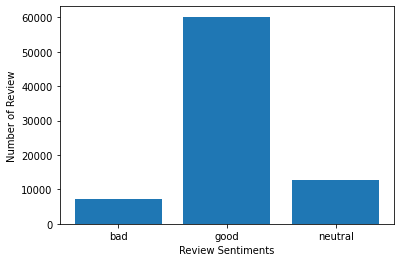

In [17]:
Sentiment_count=reviews.groupby('target').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['review_text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [18]:
reviews['review_len'] = reviews['review_text'].dropna().astype(str).apply(len)

In [19]:
reviews['word_count'] = reviews['review_text'].dropna().apply(lambda x: len(str(x).split()))

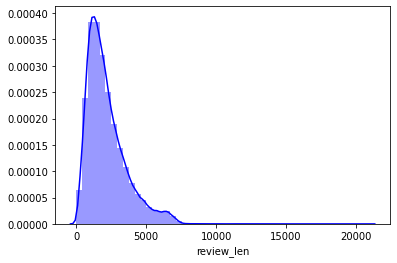

In [20]:
import seaborn as sns
sns.distplot(reviews['review_len'], color = 'blue')

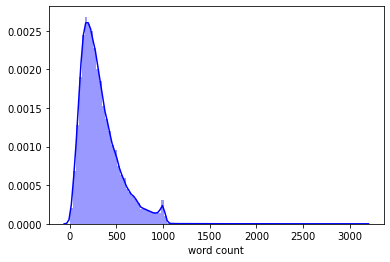

In [21]:
import seaborn as sns
sns.distplot(reviews['word_count'],
    bins=100,
    axlabel ='word count',
    color ='blue',
    label ='Review Text Word Count Distribution'
    )

In [23]:
reviews.describe()

,review_len,word_count
count,80282.000000,80282.000000
mean,2176.935054,325.375240
std,1410.811082,208.397739
min,1.000000,1.000000
25%,1160.000000,175.000000
50%,1830.000000,275.000000
75%,2834.000000,423.000000
max,20924.000000,3139.000000


In [24]:
reviews[80200:]

,target,movie_link,author_id,author_name,review_subtitle,review_text,review_len,word_count
80200,good,/film/493427/,0,Amadeo,Repeticiоn,"Люблю французские фильмы за их блестящий юмор. Люблю английские фильмы за их чопорность и сдержанность. А испанские фильмы люблю за то, что они всегда глубоко национальны и чисты в эмоциональном плане. \n\r\nКто из вас, уважаемые дамы и господа, любит клоунов? Мне никогда не смешно в цирке. Это один из самых извращенных видов искусства, похлеще сюрреализма и дады. Каким бы фееричным или эффектным не выглядело представление, всегда в нем проскальзывает следовавшая из средневековья балаганная убогость, некая блеклость красок, музыка, которая повсеместно фальшивит, и клоуны. \n\r\nЗнаете, люди иногда говорят, что чтобы стать врачом, надо быть или святым, или человеком без души  либо молча терпеть боль людей, либо бездуховно не обращать на нее внимание, беспринципно делая свое дело. На мой взгляд, с клоунами похожая ситуация  чтобы стать ими, надо быть или сумасшедшим, или безгранично любить людей. \n\n«Balada triste de trompeta» сильная кинокартина, которая, безусловно, заслуживает ...",1813.0,264.0
80201,good,/film/493427/,/user/1071917/,аррмен,Инфернальные циркачи,"Клоун весёлый. Клоун грустный. Один передразнивает другого. Территория детской «комнаты смеха» разрослась до масштабов «королевства кривых зеркал». Разбить стекло от недовольства отражением и пустить осколком кровь  нормальная реакция. Измордовать до уродства музыкальным инструментом или наставить огнестрел на испуганного ребёнка  последствие нормы. Такова жизнь. Вопрос в том, кто за такую жизнь в ответе. Автократичный режим Франко? Трудное детство с привкусом эдиповых глазниц? Сволочная инфантильность детишек, заставляющих взрослых изображать фальшивый смех и приторную грусть? Акробатка, в равной степени, испытывающая тягу к нежности и побоям? Всё сразу. Список не окончен \n\r\nПерезрелая чрезмерность китчевой вселенной Алекса де ла Иглесиа не переходит границ необузданного театра жестокости. Рамки циркового манежа очерчены заранее. Вульгарность терпима, а академический храп почти не слышен. Дикие животные содержатся в клетках. Буффонада стихийного насилия вызывает гогот у зрите...",3398.0,453.0
80202,good,/film/493427/,/user/1288272/,katrin_langsamen,Алекс де ла Иглесия  Печальная баллада для трубы,"Знаете, я посмотрела этот фильм только два часа назад, но у меня все еще играет в голове песня Рафаэля «Balada triste de trompeta», которая отлично передает атмосферу безумия, подаренную этой кинокартиной.\n\nТруба в балладе, грусти полной,\r\nО прошлом мýки не тая́,\n\r\nВсе начинается очень печально  Испания охвачена гражданской войной, и каждый, даже клоун должен вступиться за свою родину. Очень яркий образ «приветствует» нас в самом начале просмотра  клоун, вооруженный мачете, рубящий, как обезумевший, врагов. Хотя, почему как? Война порождает безумие, безумие в ответ  хаос.\n\nТак же плачет, так же стонет,\r\nКак и я \n\r\nПроходит время, война заканчивается победой Франко. А сын того самого Веселого клоуна с мачете начинает выступать в цирке, но в роли Грустного клоуна. И мы видим, что пускай противостояние уже окончено, но война продолжает жить в людях. И снова безумие.\n\nА вместе с плачем трубы стенает\r\nИ моё сердце наболевшее,\n\r\nВообще весь фильм  это безумие. Яр...",2062.0,317.0
80203,good,/film/493427/,/user/1743761/,freemen1980,Клоуны на тропе войны,"Отличная гротескная, абсурдная, сюрреалистическая и трэшевая фантасмагория, сдобренная черным юмором получилась у испанского режиссера Алекса де ла Иглесиа, таких культовых фильмов, как: Операция Мутанты и Пердита Дуранго.\n\r\nФильм повествует о двух клоунах, грустном и смешном, которые борются за сердце одной девушки, а в любви, как и на войне все средства хороши. \n\r\nПечальная баллада для трубы (Balada triste de trompeta)  это название песни Рафаэля, которая звучит в фильме и играет важную роль в воздействии на главного героя и отлично передает атмосферу бе

In [25]:
reviews.groupby('target').count()

,movie_link,author_id,author_name,review_subtitle,review_text,review_len,word_count
target,,,,,,,
bad,7281,7281,7281,5475,7281,7281,7281
good,60189,60189,60187,46500,60187,60187,60187
neutral,12814,12814,12814,8225,12814,12814,12814


In [22]:
# #removing the stopwords
# def remove_noise(text, is_lower_case=False):
#     tokens = nltk.word_tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stoplist if token not in punctlist]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stoplist if token not in punctlist]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text
# #Apply function on review column
# reviews['review_text']=reviews['review_text'].apply(remove_noise)

In [27]:
review_list = text.to_list()

In [28]:
review_list[:10]

['Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с\xa0таким тонким материалом, как\xa0история, требует мастерства и\xa0подлинного таланта. Это\xa0не фантазия и\xa0нахлынувшее воображение, а\xa0факты, подлинная история, с\xa0которой нельзя не\xa0считаться. Прочувственно то\xa0неспокойное время. Фильм не\xa0отвергает прошлое, как\xa0делают в\xa0некоторых картин, не\xa0старается выкрасить в\xa0чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о\xa0людях, об\xa0идеях, о\xa0любви. Повествует о\xa0стране, которая очень сильно изменилась, но\xa0по-прежнему существует. Хочется вериться, что\xa0никакие идеи и\xa0люди, которые борются за\xa0эти идеи, не\xa0пойдут по\xa0проторённой дороге. Уроки должны быть выучены, особенно уроки истории.',
 'Мало того, что\xa0сериал «Империя под\xa0ударом» (12 серий по\xa045-50 мин., по\xa0«делу» на\xa0серию») сам\xa0по себе,

In [29]:
import re

def preprocess_text(text):
    text = str(text).lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я0-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


data = [preprocess_text(t) for t in review_list]

In [30]:
type(data[0])

str

In [30]:
data[:10]

['настоящее кино наше кино прекрасная работа сценариста режиссера операторов профессиональный монтаж музыкальное сопровождение превосходная игра актеров работа с таким тонким материалом как история требует мастерства и подлинного таланта это не фантазия и нахлынувшее воображение а факты подлинная история с которой нельзя не считаться прочувственно то неспокойное время фильм не отвергает прошлое как делают в некоторых картин не старается выкрасить в черные цвета действующих лиц фильм всего лишь повествует о людях об идеях о любви повествует о стране которая очень сильно изменилась но по прежнему существует хочется вериться что никакие идеи и люди которые борются за эти идеи не пойдут по проторенной дороге уроки должны быть выучены особенно уроки истории',
 'мало того что сериал империя под ударом 12 серий по 45 50 мин по делу на серию сам по себе на удивление хорош и серьезен особенно памятуя то непростое время смены столетий и власти в россии ушел ельцин пришел путин уходили бандитские

In [30]:
# def convertlist(lst): 
#     return [[el] for el in lst] 

# data_sent = convertlist(data)
# data_sent[:10]

[['настоящее кино наше кино прекрасная работа сценариста режиссера операторов профессиональный монтаж музыкальное сопровождение превосходная игра актеров работа с таким тонким материалом как история требует мастерства и подлинного таланта это не фантазия и нахлынувшее воображение а факты подлинная история с которой нельзя не считаться прочувственно то неспокойное время фильм не отвергает прошлое как делают в некоторых картин не старается выкрасить в черные цвета действующих лиц фильм всего лишь повествует о людях об идеях о любви повествует о стране которая очень сильно изменилась но по прежнему существует хочется вериться что никакие идеи и люди которые борются за эти идеи не пойдут по проторенной дороге уроки должны быть выучены особенно уроки истории'],
 ['мало того что сериал империя под ударом 12 серий по 45 50 мин по делу на серию сам по себе на удивление хорош и серьезен особенно памятуя то непростое время смены столетий и власти в россии ушел ельцин пришел путин уходили бандитс

In [32]:
# import nltk
# nltk.download('punkt')

In [31]:
# data_token = []
# for sent in data_sent:
#   for s in sent:
#     data_token.append(s.split())

In [32]:
# data_token_clean = [[word for word in sub if word not in stopset] for sub in data_token]

In [31]:
lst = []
for i in data:
  lst.append(i.split())

print(lst[0])

['настоящее', 'кино', 'наше', 'кино', 'прекрасная', 'работа', 'сценариста', 'режиссера', 'операторов', 'профессиональный', 'монтаж', 'музыкальное', 'сопровождение', 'превосходная', 'игра', 'актеров', 'работа', 'с', 'таким', 'тонким', 'материалом', 'как', 'история', 'требует', 'мастерства', 'и', 'подлинного', 'таланта', 'это', 'не', 'фантазия', 'и', 'нахлынувшее', 'воображение', 'а', 'факты', 'подлинная', 'история', 'с', 'которой', 'нельзя', 'не', 'считаться', 'прочувственно', 'то', 'неспокойное', 'время', 'фильм', 'не', 'отвергает', 'прошлое', 'как', 'делают', 'в', 'некоторых', 'картин', 'не', 'старается', 'выкрасить', 'в', 'черные', 'цвета', 'действующих', 'лиц', 'фильм', 'всего', 'лишь', 'повествует', 'о', 'людях', 'об', 'идеях', 'о', 'любви', 'повествует', 'о', 'стране', 'которая', 'очень', 'сильно', 'изменилась', 'но', 'по', 'прежнему', 'существует', 'хочется', 'вериться', 'что', 'никакие', 'идеи', 'и', 'люди', 'которые', 'борются', 'за', 'эти', 'идеи', 'не', 'пойдут', 'по', 'прото

In [32]:
lst_token_clean = [[word for word in sub if word not in stopset] for sub in lst]
print(lst_token_clean[0])

['настоящее', 'кино', 'наше', 'кино', 'прекрасная', 'работа', 'сценариста', 'режиссера', 'операторов', 'профессиональный', 'монтаж', 'музыкальное', 'сопровождение', 'превосходная', 'игра', 'актеров', 'работа', 'таким', 'тонким', 'материалом', 'история', 'требует', 'мастерства', 'подлинного', 'таланта', 'это', 'фантазия', 'нахлынувшее', 'воображение', 'факты', 'подлинная', 'история', 'которой', 'считаться', 'прочувственно', 'неспокойное', 'время', 'фильм', 'отвергает', 'прошлое', 'делают', 'некоторых', 'картин', 'старается', 'выкрасить', 'черные', 'цвета', 'действующих', 'лиц', 'фильм', 'лишь', 'повествует', 'людях', 'идеях', 'любви', 'повествует', 'стране', 'которая', 'очень', 'сильно', 'изменилась', 'прежнему', 'существует', 'хочется', 'вериться', 'никакие', 'идеи', 'люди', 'которые', 'борются', 'идеи', 'пойдут', 'проторенной', 'дороге', 'уроки', 'должны', 'выучены', 'особенно', 'уроки', 'истории']


In [33]:
data_clean = [' '.join(l) for l in lst_token_clean]
data_clean[0]

'настоящее кино наше кино прекрасная работа сценариста режиссера операторов профессиональный монтаж музыкальное сопровождение превосходная игра актеров работа таким тонким материалом история требует мастерства подлинного таланта это фантазия нахлынувшее воображение факты подлинная история которой считаться прочувственно неспокойное время фильм отвергает прошлое делают некоторых картин старается выкрасить черные цвета действующих лиц фильм лишь повествует людях идеях любви повествует стране которая очень сильно изменилась прежнему существует хочется вериться никакие идеи люди которые борются идеи пойдут проторенной дороге уроки должны выучены особенно уроки истории'

In [34]:
len(data_clean)

80284

In [24]:
# pip install pymorphy2

In [21]:
# import pymorphy2
# from pymorphy2 import MorphAnalyzer
# morph = MorphAnalyzer()

In [78]:
# morph.parse("мою")

[Parse(word='мою', tag=OpencorporaTag('ADJF,Apro femn,sing,accs'), normal_form='мой', score=0.666666, methods_stack=((<DictionaryAnalyzer>, 'мою', 1967, 10),)),
 Parse(word='мою', tag=OpencorporaTag('VERB,impf,tran sing,1per,pres,indc'), normal_form='мыть', score=0.333333, methods_stack=((<DictionaryAnalyzer>, 'мою', 1813, 1),))]

In [80]:
# morph.parse("мою")[0].normal_form

'мой'

In [42]:
# def ftoken_morphem(text):
#   morphem = []
#   for i in text:
#     morphem.append([morph.parse(t)[0].normal_form for t in i])
#   return morphem

In [27]:
# test = [['мало', 'сериал', 'империя', 'ударом', '12', 'серий', '45', '50', 'мин', 'делу'],
#         ['мало', 'сериал', 'империя', 'ударом', '12', 'серий']]

In [59]:
# data_token_test = ftoken_morphem(test)
# data_token_test

[['мало',
  'сериал',
  'империя',
  'удар',
  '12',
  'серия',
  '45',
  '50',
  'мина',
  'дело'],
 ['мало', 'сериал', 'империя', 'удар', '12', 'серия']]

In [35]:
import tqdm
from tqdm import tqdm

In [74]:
# data_token_list1 = data_token_clean[:5000]
# data_token_list2 = data_token_clean[5000:10000]
# data_token_list3 = data_token_clean[10000:15000]
# data_token_list4 = data_token_clean[20000:25000]
# data_token_list5 = data_token_clean[25000:30000]
# data_token_list6 = data_token_clean[35000:40000]
# data_token_list7 = data_token_clean[40000:45000]
# data_token_list8 = data_token_clean[45000:50000]
# data_token_list9 = data_token_clean[50000:55000]
# data_token_list10 = data_token_clean[55000:60000]
# data_token_list11 = data_token_clean[60000:65000]
# data_token_list12 = data_token_clean[65000:70000]
# data_token_list13 = data_token_clean[70000:75000]
# data_token_list14 = data_token_clean[75000:]

In [72]:
# from tqdm import tqdm
# for i in tqdm(range(5)):
#   data_token_lemma1 = ftoken_morphem(data_token_list1)






  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [02:53<11:34, 173.60s/it]




 40%|████      | 2/5 [05:46<08:40, 173.53s/it]




 60%|██████    | 3/5 [08:40<05:46, 173.48s/it]




 80%|████████  | 4/5 [11:33<02:53, 173.45s/it]




100%|██████████| 5/5 [14:26<00:00, 173.34s/it]


In [125]:
# lemma_join = data_token_lemma1 + data_token_lemma2 + data_token_lemma3 + data_token_lemma4 + data_token_lemma5

In [126]:
# import json
# with open('lemma_joined.txt', 'w', encoding='utf-8') as f:
#   json.dump(lemma_join, f, ensure_ascii = False, indent = 4)

In [25]:
# pd.read_json('lemma_joined.txt')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793
0,настоящее,кино,наш,кино,прекрасный,работа,сценарист,режиссёр,оператор,профессиональный,монтаж,музыкальный,сопровождение,превосходный,игра,актёр,работа,такой,тонкий,материал,история,требовать,мастерство,подлинный,талант,это,фантазия,нахлынуть,воображение,факт,подлинный,история,который,считаться,прочувственный,неспокойный,время,фильм,отвергать,прошлое,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
1,мало,сериал,империя,удар,12,серия,45,50,мина,дело,серия,удивление,хороший,серьёзный,особенно,памятовать,непростой,время,смена,столетие,власть,россия,уйти,ельцин,прийти,путин,уходить,бандитский,90,е,восстанавливаться,мочь,законопорядок,вскоре,стать,культовый,послужить,предтеча,многий,последующий,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
2,период,реформа,александр,освободитель,один,русский,революция,вправду,эпоха,индивидуальный,террор,революционер,учебник,история,правило,упоминаться,покушение,александр,ii,один,закончиться,удачно,брат,ленин,связь,покушение,александр,iii,повесить,террор,против,должностной,лицо,империя,сводиться,пример,вера,засулич,стрелять,треповый,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
3,атмосферный,сериал,российский,империя,начало,хх,век,некоторый,серия,очень,хороший,именно,детективный,история,например,бастард,сериал,один,очередь,интересный,увлечь,история,россия,сериал,просмотреть,несколько,день,довольно,лёгкий,перегружать,зритель,тяжёлый,картинка,тяжёлый,диалог,ненавязчивый,любовный,линия,присутствовать,добродушный,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
4,самый,большой,беда,современный,общество,это,терроризм,террор,это,бессмысленный,безумный,война,человек,человек,тот,думать,помощь,террор,добиться,реализация,какой,идея,важный,политический,теологический,глубоко,ошибаться,террор,вести,лишь,боль,ненависть,также,вечный,проклятие,важный,какой,время,наступать,расплата,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,сначала,прочитать,книга,the,bourne,supremasy,сказать,один,дыхание,книга,довольно,интересный,понравиться,захотеть,посмотреть,фильм,предвкушать,визуализация,прочитать,мысленно,представлять,суметь,режиссёр,перенести,приключение,борный,книга,кино,казалось,это,весьма,просто,книга,событие,характер,место,действие,режиссёрский,находка,оказаться,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
24996,сплошной,драйв,самый,начало,фильм,идти,задать,динамичный,направление,мой,скромный,мнение,порой,фильм,хватать,некий,статика,особо,порадовать,очень,грамотно,пре

In [35]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
reviews['target'] = number.fit_transform(reviews['target'].astype('str'))

In [145]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# try:
#   for r in sent_flat:
#     X = cv.fit_transform(r)
#   y = reviews.iloc[:, 0].values
# except ValueError:
#   pass

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_clean)
y = reviews.iloc[:, 0].values

In [37]:
X.shape

(80284, 408917)

In [38]:
y.shape

(80284,)

In [39]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [142]:
# flat_list = [item for sublist in data_sent for item in sublist]
# flatten = lambda l: sum(map(flatten, l), []) if isinstance(l, list) else [l]
# sent_flat = [flatten(b) for b in data_sent]

In [99]:
from sklearn import model_selection
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [100]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(64227, 408917) (16057, 408917) (64227,) (16057,)


In [101]:
%%time 

nb = MultinomialNB()
nb.fit(X_train, y_train)

CPU times: user 181 ms, sys: 1.04 ms, total: 182 ms
Wall time: 185 ms


In [102]:
%%time
from sklearn.model_selection import cross_val_score
results_nb_cv = cross_val_score(nb, X_train, y_train, cv=10)
print(results_nb_cv.mean())

0.7988385324792127
CPU times: user 2.21 s, sys: 19.4 ms, total: 2.23 s
Wall time: 2.24 s


In [103]:
nb.score(X_test, y_test)

0.8060036121317805

In [104]:
X_test_pred = nb.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[  632,   596,   228],
       [   80, 11559,   399],
       [  116,  1696,   751]])

In [105]:
print(classification_report(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55      1456
           1       0.83      0.96      0.89     12038
           2       0.54      0.29      0.38      2563

    accuracy                           0.81     16057
   macro avg       0.71      0.56      0.61     16057
weighted avg       0.78      0.81      0.78     16057



In [85]:
def predict_cat(d):
    cat_names = {0 : 'bad', 1: 'good', 2: 'neutral'}
    cod = nb.predict(cv.transform(d))
    return cat_names[number.inverse_transform(cod)[0]]

In [87]:
predict_cat(data_clean)

KeyError: ignored

In [89]:
%%time 

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.8522139876689294
CPU times: user 1min 21s, sys: 56.5 s, total: 2min 18s
Wall time: 1min 11s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
X_test_clv_pred = clf.predict(X_test)
confusion_matrix(y_test, X_test_clv_pred)

array([[ 1367,    54,    35],
       [   21, 11908,   109],
       [   38,   225,  2300]])

In [107]:
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.9699819393410973


In [108]:
print(classification_report(y_test, X_test_clv_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1456
           1       0.98      0.99      0.98     12038
           2       0.94      0.90      0.92      2563

    accuracy                           0.97     16057
   macro avg       0.96      0.94      0.95     16057
weighted avg       0.97      0.97      0.97     16057



In [109]:
clf_pred = clf.predict(X)
np_pred = nb.predict(X)

models_correlation = np.corrcoef(clf_pred, np_pred)
models_correlation[0,1]

0.6297379212099916

Automatically created module for IPython interactive environment
Dataset reviews, train_samples=64227, n_features=408917, n_classes=3
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4
Test accuracy for model ovr: 0.7952
% non-zero coefficients for model ovr, per class:
 [29.94103938 40.7290477  38.53398122]
Run time (4 epochs) for model ovr:539.51
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.8098
% non-zero coefficients for model multinomial, per class:
 [20.84603966 30.58102255 28.98118689]
Run time (7 epochs) for model multinomial:788.18
Example run in 2354.238 s


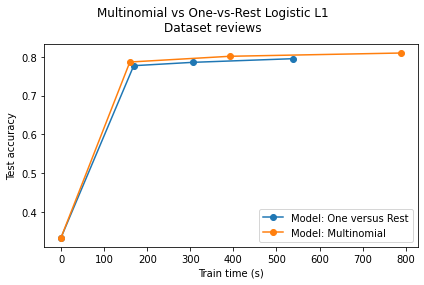

In [110]:
import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

print(__doc__)

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000


train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset reviews, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % 'reviews')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Example run in %.3f s' % run_time)
plt.show()

In [166]:
y_pred

'multinomial'

In [43]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
from tqdm import tqdm
for i in tqdm(range(5)):
  from sklearn.model_selection import GridSearchCV
  # Performing CV to tune parameters for best SVM fit 
  svm_model = GridSearchCV(SVC(), params_grid, cv=5)
  svm_model.fit(X_train_scaled, y_train)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score